100%|██████████| 50/50 [00:13<00:00,  3.62it/s]


1/1 [==============================] - 0s 442ms/step
Mean Squared Error: 764.4232986150631


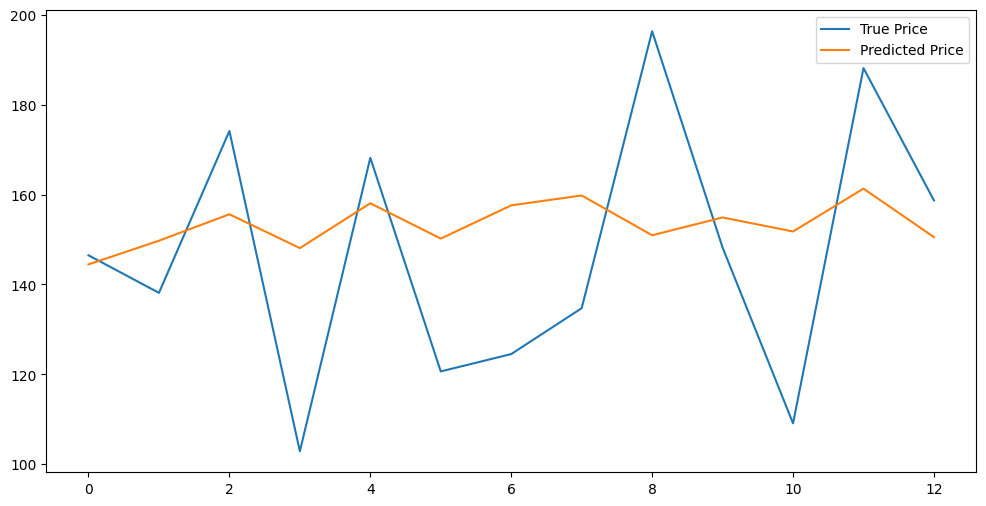

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from tqdm import tqdm

#Reading stock data
data = pd.read_csv('stock_prices.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

#Creating sequences and split data
seq_length = 10
X, y = create_sequences(data_scaled, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
for epoch in tqdm(range(50)):
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
#Prediction
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
#Display results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.show()
